###  Phase ripples and speckles


In [89]:
#from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils
import poppy.matrixDFT as matrixDFT

# For notebook animations
from matplotlib import animation
from IPython.display import HTML

In [90]:
def zztop():  
    x=5
    return x

In [91]:
print(zztop())

5


In [92]:
mpl.rcParams['figure.dpi'] = 100

We create a circular aperture 1/4 the array size, so our image plane pixels are $\lambda/4D$, or twice-Nyquist, for  easy viewing.  We use the DFT the way the FFT works in that there is no loss of information between  planes, input & output arrays are the same size.  For display purposes we might plot the central portion  of the image plane.

In [98]:
nn = 200
# slice for viewing central part of image
slc = slice(nn//4,-nn//4)
print(slc)
# exponent to use viewing psfs
imexpo = 0.25
entrancepupil = utils.makedisk(nn,  radius=nn/8.0)

slice(50, -50, None)


In [108]:
phases = createripples((nn,nn), offsets=(0,), angles=(0,60))
phases.append(phases[0] + phases[1]) # two ripples!

In [109]:
def calcpsf_fftstyle(pupil, phase):
  """ 
  calculate fftstyle no-loss-of-info PSF
  pupil and phase(radians)  arrays must be samme shape
  """
  # instantiate an mft object:
  ft = matrixDFT.MatrixFourierTransform()
    
  imagefield = ft.perform(pupil*np.exp(1j*phase), pupil.shape, pupil.shape)
  image_intensity = (imagefield*imagefield.conj()).real
  return image_intensity / image_intensity.max()

In [110]:
psfs = []
ripplepeak = 0.3 # radians
for ph in  phases:
  psfs.append(calcpsf_fftstyle(entrancepupil, ripplepeak*ph))

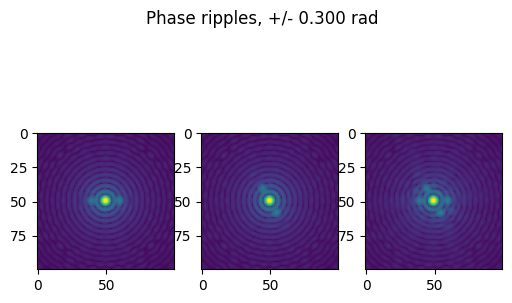

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Phase ripples, +/- {ripplepeak:.3f} rad')
ax1.imshow(np.power(psfs[0][slc,slc], imexpo))
ax2.imshow(np.power(psfs[1][slc,slc], imexpo))
ax3.imshow(np.power(psfs[2][slc,slc], imexpo))